# **Artifical Neural Networks**

A **neural network** is a computational model inspired by the structure and function of the human brain's interconnected neurons. Similarly, a neural network is composed of interconnected nodes (artificial neurons) that are organized into layers. These layers include an input layer, one or more hidden layers, and an output layer.

Each node receives input signals, performs computations on them, and then passes the result to the next layer of nodes. This process is typically repeated through multiple layers and is referred to as **forward propagation**.

The connections between nodes, often represented by weights, determine the strength of influence one node has on another. During training, each node receives input from the previous layer, multiplies it by the corresponding weight, adds a bias to the weighted sum, and then applies an activation function to the weighted biased sum.

The output layer generates the final result or prediction based on the computations performed by the hidden layers. The output can be a single value (for regression tasks) or a set of probabilities (for classification tasks).

During the training process, the neural network adjusts the weights of the connections between neurons to minimize the error between the predicted output and the expected output, using optimization algorithms like gradient descent. This process is called **backpropagation**, where the error is propagated backward through the network, and the weights (as well as the biases) are updated to reduce the error.

---

To build and train our neural networks, we'll make use of PyTorch. **PyTorch** is an open-source deep learning framework developed primarily by Facebook and offers a rich ecosystem of tools and libraries that simplify various aspects of deep learning tasks. Additionally, PyTorch provides support for GPU acceleration.

In [1]:
import torch

## **Replicating a Simple Neural Network (Optional)**

Let's construct a neural network to emulate a 2-input XOR gate. This network will consist of two input nodes (one for each input) and a single output node for the result. We'll include a single hidden layer with three hidden nodes.

The schematic for our model is as follows:
<center><img src="data/images/neural-network.png" alt="Neural Network Diagram" width="800" height="800"></center>

where $x_{ij}$ represents the $j^{th}$ node in the $i^{th}$ layer.  

- $\{x_{11}, x_{12}\}$ denote the input nodes
- $\{x_{21}$, $x_{22}$, $x_{23}\}$ signify the hidden nodes
- $\{x_{31}\}$ indicates the output node

The output of each node is determined by taking the input, multiplying it by the respective weight, adding the bias to the weighted sum, and then passing the result to an activation function, yielding the final output of that node. Therefore, we can express this as:

These equations can be represented using matrices as follows:

$$
\begin{pmatrix}
x_{21} & x_{22} & x_{23}
\end{pmatrix}
=
\begin{pmatrix}
x_{11} & x_{12}
\end{pmatrix}
\times
\begin{pmatrix}
w_{1} & w_{2} & w_{3} \\
w_{4} & w_{5} & w_{6}
\end{pmatrix}
+
\begin{pmatrix}
b_{1} & b_{2} & b_{3}
\end{pmatrix}
$$

$$
x_{31} = \begin{pmatrix} x_{21} & x_{22} & x_{23} \end{pmatrix} \times \begin{pmatrix} w_{7} \\ w_{8} \\ w_{9} \end{pmatrix} + b_{4}
$$

**Note:** Although not explicitly shown, after computing the product of the inputs with the weights and adding the bias, the resulting value is typically passed through an activation function.

We'll begin by specifying the number of nodes in each layer.

In [25]:
# Define parameters
input_nodes = 2
hidden_nodes = 3
output_nodes = 1

Next, we'll generate our training data and target results as tensors, analogous to `x_train` and `y_train`. A **tensor** is a versatile data structure that extends the concept of scalars, vectors, and matrices to higher dimensions. They are especially beneficial in deep learning and neural networks.

In [26]:
# Define some sample training data
x_train = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]
x_train = torch.tensor(x_train, dtype=torch.float32)  # Convert training input to tensor

y_train = [
    [0],  # 0 XOR 0 = 0
    [1],  # 0 XOR 1 = 1
    [1],  # 1 XOR 0 = 1
    [0]   # 1 XOR 1 = 0
]
y_train = torch.tensor(y_train, dtype=torch.float32)  # Convert training output to tensor

Moving forward, we'll initialize the weights and biases to arbitrary values, such as 1, for this demonstration. The size of these matrices is obtained from the description above. (We'll discuss the `requires_grad` parameter later on.)

In [31]:
# Initialize weights and biases
weights_input_hidden = torch.ones(input_nodes, hidden_nodes, requires_grad = True) # 2 x 3 matrix
weights_hidden_output = torch.ones(hidden_nodes, output_nodes, requires_grad = True) # 3 x 1 matrix

biases_input_hidden = torch.ones(hidden_nodes, requires_grad = True)
biases_hidden_output = torch.ones(output_nodes, requires_grad = True)

In this section, let's define the forward pass and the activation function.

The **forward pass** refers to the process of propagating input data through the network layers to obtain output predictions. During the forward pass, input data undergoes transformation by applying weights, biases, and activation functions at each layer until it reaches the output layer.

The **activation function** is a non-linear function applied to the output of each node. Its role is to introduce non-linearity, enabling the network to learn complex patterns and relationships in data. Common activation functions include ReLU (Rectified Linear Unit), sigmoid, and tanh.

In [28]:
# Define the activation function (ReLU)
def activation_fn(x):
    threshold = torch.tensor(0.0)
    return torch.max(threshold, x)

# Define Forward Pass Function
def forward_pass(x):
    # Input Layer to Hidden Layer
    hidden_layer_output = torch.matmul(x, weights_input_hidden) + biases_input_hidden  # Perform matrix multiplication and add biases (Refer to equations above)
    hidden_layer_output = activation_fn(hidden_layer_output)  # Apply ReLU activation function

    # Hidden Layer to Output Layer
    output = torch.matmul(hidden_layer_output, weights_hidden_output) + biases_hidden_output  # Perform matrix multiplication and add biases (Refer to equations above)

    return output

Before moving forward, let's delve into a few crucial terms:

Neural networks undergo training via an iterative process known as **gradient descent**. Its objective is to minimize a **loss function**—a metric quantifying the disparity between predicted outputs and expected outputs—by adjusting the network's weights and biases in the direction of the negative gradient of the loss function.

The training process consists of two primary stages:

1. **Forward Pass**: Input data traverses through the network layers, computing output predictions. Subsequently, the loss function is determined based on the variance between predicted outputs and actual target outputs.

2. **Backward Pass**: Gradients of the loss function concerning the weights and biases are computed through backpropagation. These gradients indicate how weights and biases should be adjusted to diminish the loss. This is why we set the `requires_grad` parameter earlier on. It signifies whether a tensor should have its gradients monitored during the backward pass of the backpropagation algorithm. This enables PyTorch to compute gradients of the weights and biases concerning the loss function, which are then employed to update the weights and biases during optimization.

The **learning rate** denotes the hyperparameter dictating the magnitude at which a neural network's weights and biases are updated. A higher learning rate implies more aggressive updates, potentially accelerating convergence but heightening the risk of overshooting optimal values and deviating from the solution. Conversely, a lower learning rate results in slower convergence yet offers greater stability, minimizing the risk of divergence.

Lastly, **epochs** pertain to the number of complete passes through the entire training dataset during the training process of a neural network or any other machine learning model.

Specifically within neural network training:

1. The training data is typically partitioned into smaller batches of samples.
2. During each iteration (epoch) of the training loop, the model traverses through all batches in the training dataset once.
3. For each batch, the model conducts a forward pass to compute predictions, evaluates the loss between predictions and true labels, and then performs a backward pass to compute gradients and update the model's weights and biases using an optimization algorithm such as gradient descent.
4. Upon completing one full traverse over all batches in the training data, one epoch is concluded.

In [32]:
# Training Loop
learning_rate = 0.1
num_epochs = 25  

for epoch in range(num_epochs):
    # Forward Pass
    y_predictions = forward_pass(x_train)  # Perform forward pass to get predicted outputs
    loss = ((y_predictions - y_train) ** 2).mean()  # Calculate the mean squared loss

    # Backward propagation and optimization
    loss.backward()  # Compute gradients using backward propagation

    # Update the weights using gradient descent
    with torch.no_grad():
        # Update weights and biases for input-hidden layer
        weights_input_hidden -= learning_rate * weights_input_hidden.grad
        biases_input_hidden -= learning_rate * biases_input_hidden.grad

        # Update weights and biases for hidden-output layer
        weights_hidden_output -= learning_rate * weights_hidden_output.grad
        biases_hidden_output -= learning_rate * biases_hidden_output.grad

        # Manually zero the gradients to prepare for the next iteration
        weights_input_hidden.grad.zero_()
        biases_input_hidden.grad.zero_()
        weights_hidden_output.grad.zero_()
        biases_hidden_output.grad.zero_()

    # Print the current loss
    print(f'Epoch [{epoch+1:02}/{num_epochs}], Loss: {loss.item():6.3f}')

Epoch [01/25], Loss: 47.000
Epoch [02/25], Loss:  1.057
Epoch [03/25], Loss:  0.624
Epoch [04/25], Loss:  0.489
Epoch [05/25], Loss:  0.403
Epoch [06/25], Loss:  0.348
Epoch [07/25], Loss:  0.313
Epoch [08/25], Loss:  0.290
Epoch [09/25], Loss:  0.276
Epoch [10/25], Loss:  0.266
Epoch [11/25], Loss:  0.261
Epoch [12/25], Loss:  0.257
Epoch [13/25], Loss:  0.254
Epoch [14/25], Loss:  0.253
Epoch [15/25], Loss:  0.252
Epoch [16/25], Loss:  0.251
Epoch [17/25], Loss:  0.251
Epoch [18/25], Loss:  0.250
Epoch [19/25], Loss:  0.250
Epoch [20/25], Loss:  0.250
Epoch [21/25], Loss:  0.250
Epoch [22/25], Loss:  0.250
Epoch [23/25], Loss:  0.250
Epoch [24/25], Loss:  0.250
Epoch [25/25], Loss:  0.250


The initial high loss of 47.0 was expected since the model was untrained and initialized with arbitrary weights and biases. However, as the model underwent training, the loss gradually diminished, stabilizing around the 23rd epoch. This suggests that the model successfully acquired meaningful representations and made accurate predictions for the XOR problem.

Now, it's time to evaluate our trained model.

In [33]:
# Define some testing data
inputs = [
    [0, 1],  # 1
    [1, 0],  # 1
    [1, 1],  # 0 
    [0, 0],  # 0
    [0, 1],  # 1 (Duplicate for demonstration purposes)
]
inputs = torch.tensor(inputs, dtype=torch.float32)  # Convert testing input to tensor

# Test the trained model
with torch.no_grad():
    test_outputs = forward_pass(inputs)  # Get predictions from the trained model
    predicted_labels = test_outputs.flatten()  # Flatten the output tensor
    predicted_labels_binary = (predicted_labels > 0.5).float()  # Convert predictions to binary format
    print("Prediction (Binary): ", predicted_labels_binary)  # Print the predicted labels

Prediction (Binary):  tensor([0., 0., 0., 0., 0.])


As observed, the model's performance was subpar, achieving an accuracy of only 40%. To enhance its efficacy, we can refine the model by adjusting parameters such as adding or removing hidden layers, altering the activation function, and modifying the learning rate.

For instance, let's streamline the model by reducing the number of hidden nodes to two, a strategy that sometimes enhances performance. Additionally, we'll employ the tanh activation function and extend the training duration to 500 epochs for comprehensive learning.

In [39]:
# Define parameters
input_nodes = 2
hidden_nodes = 2  # Two hidden nodes
output_nodes = 1

# Define training data
x_train = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]
x_train = torch.tensor(x_train, dtype=torch.float32)

y_train = [
    [0],  # 0 XOR 0 = 0
    [1],  # 0 XOR 1 = 1
    [1],  # 1 XOR 0 = 1
    [0]   # 1 XOR 1 = 0
]
y_train = torch.tensor(y_train, dtype=torch.float32)

# Initialize weights and biases (This time, we'll initialize to random values instead of 1s)
weights_input_hidden = torch.randn(input_nodes, hidden_nodes, requires_grad=True)
weights_hidden_output = torch.randn(hidden_nodes, output_nodes, requires_grad=True)

biases_input_hidden = torch.randn(hidden_nodes, requires_grad=True)
biases_hidden_output = torch.randn(output_nodes, requires_grad=True)

# Define the activation function (tanh)
def activation_fn(x):
    return torch.tanh(x)

# Define Forward Pass Function
def forward_pass(x):
    
    hidden_layer_output = torch.matmul(x, weights_input_hidden) + biases_input_hidden  
    hidden_layer_output = activation_fn(hidden_layer_output)  

    output = torch.matmul(hidden_layer_output, weights_hidden_output) + biases_hidden_output

    return output

# Training Loop
learning_rate = 0.1
num_epochs = 1000

for epoch in range(num_epochs):
    # Forward Pass
    y_predictions = forward_pass(x_train)
    loss = ((y_predictions - y_train) ** 2).mean()

    # Backward propagation and optimization
    loss.backward()  # Compute gradients

    # Update the weights using gradient descent
    with torch.no_grad():
        weights_input_hidden -= learning_rate * weights_input_hidden.grad
        biases_input_hidden -= learning_rate * biases_input_hidden.grad
        weights_hidden_output -= learning_rate * weights_hidden_output.grad
        biases_hidden_output -= learning_rate * biases_hidden_output.grad

        # Manually zero the gradients
        weights_input_hidden.grad.zero_()
        biases_input_hidden.grad.zero_()
        weights_hidden_output.grad.zero_()
        biases_hidden_output.grad.zero_()

        if ((epoch + 1) % 100 == 0):  # Print every 100 iterations
            print(f'Epoch [{epoch+1:04}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [0100/1000], Loss: 0.1363
Epoch [0200/1000], Loss: 0.0074
Epoch [0300/1000], Loss: 0.0001
Epoch [0400/1000], Loss: 0.0000
Epoch [0500/1000], Loss: 0.0000
Epoch [0600/1000], Loss: 0.0000
Epoch [0700/1000], Loss: 0.0000
Epoch [0800/1000], Loss: 0.0000
Epoch [0900/1000], Loss: 0.0000
Epoch [1000/1000], Loss: 0.0000


Now, let's test.

In [41]:
# Define some testing data
inputs = [   # Expected output
    [0, 0],  # 0
    [1, 1],  # 0
    [1, 1],  # 0 
    [1, 0],  # 1
    [0, 1],  # 1
]
inputs = torch.tensor(inputs, dtype=torch.float32)

# Test the trained model
with torch.no_grad():
    test_outputs = forward_pass(inputs)
    predicted_labels = test_outputs.flatten()
    predicted_labels_binary = (predicted_labels > 0.5).float()
    print("Predictions: ", predicted_labels_binary)

Predictions:  tensor([0., 0., 0., 1., 1.])


By tweaking the parameters, we managed to attain a perfect accuracy of 100%.

## **Linear Regression using PyTorch**

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn

In the first two segments, we'll leverage PyTorch to construct a line of best fit for a specified dataset. Our objective is to minimize the disparity between our model and the real data.

### **Example 1: Linear Dataset**

We'll begin by setting the seed and generating the dataset.

> Computers aren't capable of generating actual random numbers. They follow a precise algorithm that appears random to us but is deterministic in nature. This algorithm relies on a single parameter, known as the seed, which produces different sequences of random numbers. Interestingly, if we provide the same algorithm with the same seed, it will always generate the exact same sequence of random numbers. By default, this seed is typically set as the number of seconds elapsed since January 1, 1970. It is a common practice to set the seed whenever working with random data so that others may replicate your experiment.

It's always preferable to shape the $x$ data as $(rows, 1)$. This prevents multiplication inconveniences down the line, where the columns of the first matrix and the rows of the second matrix have to match.

In [44]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate x_data from 1 to 50 with 50 data points
x_data = np.linspace(start=1, stop=50, num=50).reshape(-1, 1)

# Generate random noise between -8 and 8 for each data point
noise = np.random.randint(low=-8, high=9, size=50).reshape(-1, 1)

# Generate y_data using the equation: y = 2 * x + 1 + noise
# 2 is the weight and 1 is the bias
y_data = 2 * x_data + 1 + noise

We can now plot our generated data set. 

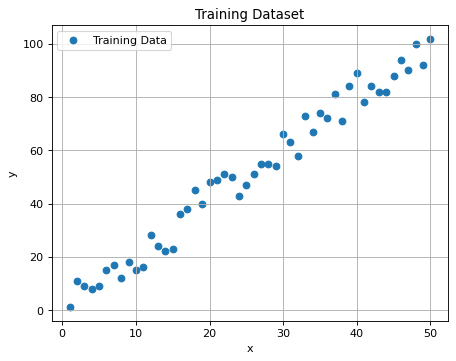

In [45]:
# Scatter plot of the training dataset with label
plt.scatter(x_data, y_data, label="Training Data")

# Set title, labels, legend, and grid
plt.title("Training Dataset")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()

# Show plot
plt.show()

Our objective is to train a neural network model to accurately determine the appropriate weight and bias parameters. We anticipate that the ideal outcome should yield a weight of approximately 2 and a bias of approximately 1, since those were the values we used to create our dataset.

#### **nn.Linear() Model**

Rather than developing our own model from scratch, as we did in the preceding segment, we will utilize PyTorch's built-in models, specifically the `nn.Linear()` model.

The `nn.Linear()` module is a module that represents a linear transformation. It applies a linear transformation to the incoming data:

$$
y = x \cdot A^{T} + b
$$

where $x$ is the input tensor, $A$ is the learnable weights, $b$ is the bias tensor, and $y$ is the output tensor.

The `nn.Linear()` module creates only one layer by default. This single layer performs a linear transformation on the input data using the specified input size and output size.

`nn.Linear(in_features, out_features, bias=True)`

- **in_features**: This parameter specifies the size of the input features. It indicates the number of features in the input data that will be transformed by the linear layer.
- **out_features**: This parameter specifies the size of the output features. It indicates the number of features that the linear system will produce as output.
- **bias**: This parameter is a boolean value that indicates whether to include a bias term in the linear transformation. By default, it is set to <tt>True</tt>, which means a bias term will be included. If set to <tt>False</tt>, the linear transformation will not have a bias term.

Since our model only contains a single input feature ($x$) and a single output feature ($y$), we'll set both parameters to 1.

> The <tt>nn.Linear(x, y)</tt> module creates a single linear layer with $x$ input features and $y$ output features. If you need multiple layers in a neural network, you would typically stack multiple instances of <tt>nn.Linear()</tt> along with activation functions to create a deeper network. For this problem, however, a single layer is more than enough.

Lastly, the `nn.Linear()` model will preselect the initial weights and biases for us at random. As such, we'll also set the seed for Torch.

In [80]:
torch.manual_seed(42);

Let's instantiate our model and display the initialized weight and bias. Note that we only have one of each since we have a single layer with a single input and output node.

In [81]:
# Define the linear model
model = nn.Linear(in_features=1, out_features=1)

# Print initialized weight and bias
print(f"Initialized Weight: {model.weight}, Initialized Bias: {model.bias}")

Initialized Weight: Parameter containing:
tensor([[0.7645]], requires_grad=True), Initialized Bias: Parameter containing:
tensor([0.8300], requires_grad=True)


Note that the weight and bias are both encapsulated as tensors. If we would like to extract only the value portion, we can call `item()`.

In [82]:
# Print initialized weight and bias with 3 decimal places
print(f"Initialized Weight: {model.weight.item():.3f}, Initialized Bias: {model.bias.item():.3f}")

Initialized Weight: 0.765, Initialized Bias: 0.830


Just for demonstration purposes, let's examine the outcome when we input a value of 2 to our model. The expected output is calculated as follows:

$$
y = 0.765 \cdot 2 + 0.830 = 2.360
$$

To execute this forward pass, we'll utilize the `forward()` method. This method defines the forward pass of our neural network, specifying how the input data flows through the layers to generate the output. Initially, we don't need to implement it ourselves, but we will need to when incorporating multiple layers.

Additionally, it's worth noting that the `forward()` method takes a tensor as input.

In [83]:
# Define the input tensor
input = torch.tensor([2], dtype=torch.float32)

# Perform the forward pass
output = model.forward(input) # output = model(input) also works, we'll use the latter notation later on.

# Print input and output with 3 decimal places
print(f"Input: {input.item()}, Output: {output.item():.3f}")  # Output matches the expected value

Input: 2.0, Output: 2.359


Let's go ahead and convert our training data into tensors.

In [84]:
# Converting NumPy arrays to PyTorch tensors
X = torch.tensor(x_data, dtype=torch.float32)
Y = torch.tensor(y_data, dtype=torch.float32)

#### **Plot the Initial Model**

Before training our model, let's plot it against our training set to get an idea of our starting point.

To plot a line, we need atleast two points; let's take the first and last points from our dataset. Then, we'll compute the corresponding output, and finally plot.

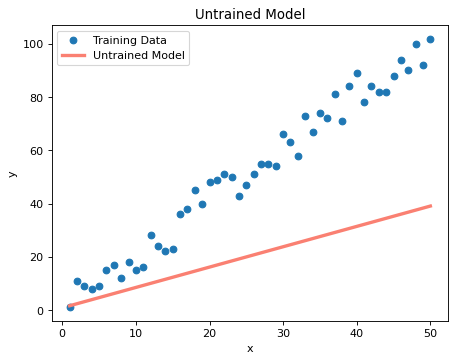

In [85]:
Y_predictions = model.forward(X) # model(X) also works, we'll use the latter notation later on.

# Plot
plt.scatter(x_data, y_data, label="Training Data")
plt.plot(X, Y_predictions.detach().numpy(), label="Untrained Model", color="salmon", linewidth = 3)

# Adding title and labels
plt.title("Untrained Model")
plt.xlabel("x")
plt.ylabel("y")

# Adding legend and displaying the plot
plt.legend()
plt.show()

As observed, the model isn't very accurate, which is expected since it hasn't been trained on any data yet. This initial assessment will serve as a benchmark for comparison once we proceed with training the model.

#### **Loss Function**

Once more, the **loss function** gauges the difference between the model's predicted output and the actual target output. In this instance, we've opted for the Mean Square Error (MSE) as our chosen loss function.

Thankfully, PyTorch offers a plethora of predefined loss functions, including MSE, within its `torch.nn` module. The `nn.MSELoss()` function creates an object representing the Mean Squared Error loss, which can be employed to compute the MSE loss between the model predictions and target values during training.

In [86]:
cost = nn.MSELoss()

#### **Optimization**

**Stochastic Gradient Descent (SGD)** stands as a widely utilized optimization algorithm for training machine learning models, encompassing neural networks. It operates as an iterative optimization technique designed to minimize the loss function by adjusting the model's parameters based on the gradients of the loss function concerning those parameters. In each iteration, SGD updates the parameters in the direction that diminishes the loss.

The **Learning Rate** serves as a crucial hyperparameter dictating the magnitude of steps taken by the optimizer during parameter updates. It dictates the extent to which parameters are modified in the direction opposing the gradient. A higher learning rate induces larger updates, whereas a lower learning rate results in smaller adjustments. The learning rate's significance lies in its impact on the convergence and stability of the optimization process.

PyTorch offers an `optim` module housing various optimization algorithms, SGD included. The `torch.optim.SGD()` function instantiates an SGD optimizer, taking as input the model's parameters to be optimized (accessible via `model.parameters()`) and the learning rate. Optionally, momentum and weight decay can be specified as arguments to `torch.optim.SGD()` for more sophisticated optimization strategies.

In [87]:
# Define the SGD optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

#### **Train the Model**

Here is an explanation of the training process:

1. **Define the number of epochs**: An epoch refers to a single pass through the entire dataset during the training process. In our code, the variable epochs is set to 50, indicating that the training loop will iterate over the entire dataset 50 times.
2. **Initializing an Empty List for Losses**: The list losses is initialized to store the value of the loss function at each iteration during training. This allows for the tracking of the model's performance over the course of training
3. **Training Loop**: The loop iterates over the specified number of epochs (epochs). Within each epoch, the following steps are performed:

   a. **Forward Pass**: The model (model) is used to make predictions (y_pred) on the input data (X). This is done by calling the model's forward() method, which computes the forward pass through the neural network layers.
   
   b. **Calculating Loss**: The loss between the predicted values (y_pred) and the actual target values (y) is computed using the predefined loss function. In this case, Mean Squared Error (MSE) is used as the loss function.
   
   c. **Storing Loss**: The computed loss is appended to the losses list for later analysis and visualization.
   
   d. **Printing Training Progress**: Information such as the current epoch number (i), the value of the loss function (loss), as well as the weights and biases of the model's linear layer are printed to monitor the training progress.
   
   e. **Backpropagation and Parameter Update**: The optimizer's gradient buffers are reset using `optimizer.zero_grad()`. Then, the gradients of the loss function with respect to the model parameters are computed using backpropagation (`loss.backward()`). Finally, the optimizer takes a step in the direction that minimizes the loss by updating the model parameters using the gradients (`optimizer.step()`).

In [88]:
epochs = 50
losses = []

for epoch in range(epochs):
    # Forward pass
    y_predictions = model.forward(X)

    # Calculate loss
    loss = cost(y_predictions, Y)
    losses.append(loss)

    # Print current epoch's loss and model parameters
    print(f"Epoch [{epoch + 1:02}/{epochs}] - Loss: {loss.item():8.3f}, Weight: {model.weight.item():.3f}, Bias: {model.bias.item():.3f}")

    # Backward pass and optimization
    optimizer.zero_grad()  # Zero the gradients
    loss.backward()  # Compute gradients
    optimizer.step()  # Update weights based on gradients

Epoch (01/50): Loss: 1305.148, Weight: 0.765, Bias: 0.830
Epoch (02/50): Loss:  684.091, Weight: 2.864, Bias: 0.893
Epoch (03/50): Loss:  363.461, Weight: 1.356, Bias: 0.848
Epoch (04/50): Loss:  197.932, Weight: 2.440, Bias: 0.880
Epoch (05/50): Loss:  112.475, Weight: 1.661, Bias: 0.857
Epoch (06/50): Loss:   68.356, Weight: 2.220, Bias: 0.874
Epoch (07/50): Loss:   45.579, Weight: 1.818, Bias: 0.862
Epoch (08/50): Loss:   33.821, Weight: 2.107, Bias: 0.871
Epoch (09/50): Loss:   27.750, Weight: 1.900, Bias: 0.865
Epoch (10/50): Loss:   24.616, Weight: 2.049, Bias: 0.870
Epoch (11/50): Loss:   22.998, Weight: 1.942, Bias: 0.867
Epoch (12/50): Loss:   22.162, Weight: 2.019, Bias: 0.869
Epoch (13/50): Loss:   21.731, Weight: 1.963, Bias: 0.868
Epoch (14/50): Loss:   21.508, Weight: 2.003, Bias: 0.869
Epoch (15/50): Loss:   21.393, Weight: 1.974, Bias: 0.868
Epoch (16/50): Loss:   21.334, Weight: 1.995, Bias: 0.869
Epoch (17/50): Loss:   21.303, Weight: 1.980, Bias: 0.869
Epoch (18/50):

To visualize how the losses changed over time during training, we can plot the loss values at each epoch.

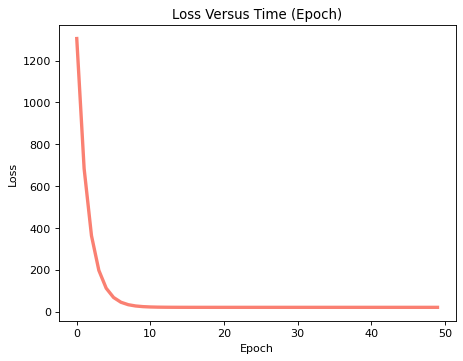

In [90]:
# Define horizontal points (epochs) and vertical points (loss values)
horizontal_points = range(epochs)
vertical_points = [loss.item() for loss in losses]

# Plot the loss values
plt.plot(horizontal_points, vertical_points, color = 'salmon', linewidth = 3)

# Set title, labels, and display the plot
plt.title("Loss Versus Time (Epoch)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

We can see that out losses reached a plateau after the 10<sup>th</sup> iteration. 

#### **Plot the Trained Model**

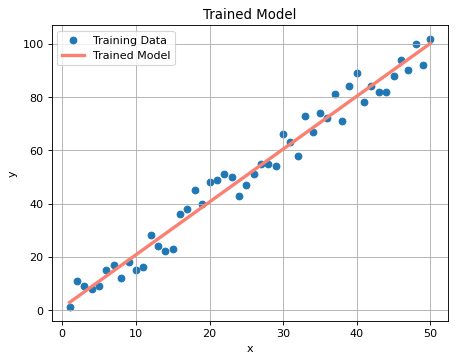

In [94]:
# Compute the corresponding output
Y_predictions = model(X)

# Plot
plt.scatter(x_data, y_data, label="Training Data")
plt.plot(X, Y_predictions.detach().numpy(), label="Trained Model", color="salmon", linewidth=3)

# Set title, labels, legend, and display the plot
plt.title("Trained Model")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()

### **Example 2: Nonlinear Dataset**

For this example, our aim is to establish the best-fit line for a dataset that doesn't exhibit a linear pattern. Intuitively, our neural network will need to be more intricate this time, since a single layer won't suffice. This is becase a single layer with a lone node lacks the complexity and sophistication necessary to comprehend nonlinear patterns in data.

We'll see how to create multiple layers utilizing `nn.Linear()` shortly. First, let's generate the test data. For this demonstration, let's assume our data mimics a quadratic function.

In [110]:
# Generate input data
x_data = np.linspace(start=0, stop=15, num=50).reshape(-1, 1)

# Noise
noise = np.random.randint(low = -3, high = 4, size = 50).reshape(-1, 1)

# Compute corresponding output data
y_data = -1 * (x_data - 5) * (x_data - 6) + 100 + noise

Let's plot the generated dataset.

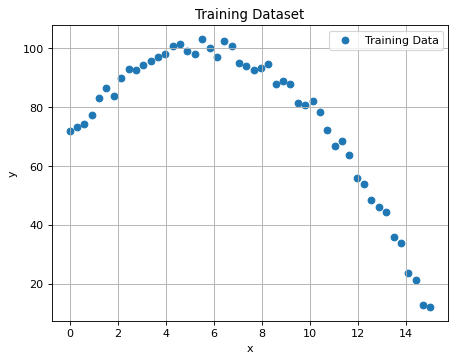

In [111]:
# Plot the training data
plt.scatter(x_data, y_data, label="Training Data")

# Set title, labels, legend, and display the plot
plt.title("Training Dataset")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

#### **Creating a Multi-layer Model**

To create a multilayer model using `nn.Linear`, we'll define a class that inherits fromthe `nn.Module` class. This class will define the architecture of our neural network, including the layers, their interconnections, and the forward pass.

In this example, let's construct a model with two hidden layers. The initial hidden layer comprises 6 nodes, and the subsequent hidden layer comprises 6 nodes. Naturally, the first layer will possess only a single node, considering we have a singular input feature. Similarly, the output layer will contain only a single node, as we have a sole output feature.

> 8 and 9 nodes in the hidden layers may seem excessive for this problem (and it is), but we'll proceed for the sake of demonstration.

Lastly, the line `import torch.nn.functional` as `F` imports the `torch.nn.functional module` and aliases it as `F`. This module provides functional operations (e.g., activation functions, loss functions, etc.) commonly used in neural network layers and operations

In [112]:
import torch.nn.functional as F

In [113]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size_1, hidden_size_2, output_size):
        super(Model, self).__init__()
        
        # Define the fully connected layers
        self.fc1 = nn.Linear(input_size, hidden_size_1)
        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2)
        self.fc3 = nn.Linear(hidden_size_2, output_size)

    def forward(self, x):
        # Forward pass through the network
        
        # Pass through first fully connected layer and apply ReLU activation
        x = F.relu(self.fc1(x)) # F.relu(self.fc1.forward(x)) works as well
        
        # Pass through second fully connected layer and apply ReLU activation
        x = F.relu(self.fc2(x)) # F.relu(self.fc2.forward(x)) works as well
        
        # Pass through third fully connected layer (no activation function for output)
        x = self.fc3(x) # self.fc3.forward(x) works as well

        return x

Now, we'll instantiate the model.

In [115]:
torch.manual_seed(42)

model = Model(input_size=1, hidden_size_1=8, hidden_size_2=9, output_size=1);

Moving on, let's define our loss function and optimizer. 

In [116]:
# Define the Mean Squared Error (MSE) loss function
cost = nn.MSELoss()

# Define the stochastic gradient descent (SGD) optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

#### **Training the Model**

In [117]:
# Define the number of epochs for training
epochs = 10000

# Convert input and target data to PyTorch tensors
X = torch.tensor(x_data, dtype=torch.float32)
Y = torch.tensor(y_data, dtype=torch.float32)

# Loop through the specified number of epochs
for epoch in range(epochs):
    # Forward pass: compute predictions
    y_predictions = model(X)

    # Compute the loss between predictions and targets
    loss = cost(y_predictions, Y)

    # Print loss every 500 epochs
    if (epoch + 1) % 500 == 0:
        print(f"Epoch [{epoch + 1:05}/{epochs}] - Loss: {loss.item():8.3f}")

    # Reset gradients to zero
    optimizer.zero_grad()

    # Backpropagation: compute gradients
    loss.backward()

    # Update model parameters using optimizer
    optimizer.step()

Epoch [00500/10000] - Loss: 1437.760
Epoch [01000/10000] - Loss:  623.788
Epoch [01500/10000] - Loss:  623.713
Epoch [02000/10000] - Loss:  623.709
Epoch [02500/10000] - Loss:  623.709
Epoch [03000/10000] - Loss:  623.709
Epoch [03500/10000] - Loss:  623.709
Epoch [04000/10000] - Loss:  623.709
Epoch [04500/10000] - Loss:  623.709
Epoch [05000/10000] - Loss:  623.709
Epoch [05500/10000] - Loss:  623.709
Epoch [06000/10000] - Loss:  623.709
Epoch [06500/10000] - Loss:  623.709
Epoch [07000/10000] - Loss:  623.709
Epoch [07500/10000] - Loss:  623.709
Epoch [08000/10000] - Loss:  623.709
Epoch [08500/10000] - Loss:  623.709
Epoch [09000/10000] - Loss:  623.709
Epoch [09500/10000] - Loss:  623.709
Epoch [10000/10000] - Loss:  623.709


As we can see, our loss is significantly high and did not decrease as the training time increased. Let's plot our trained model against our training data.

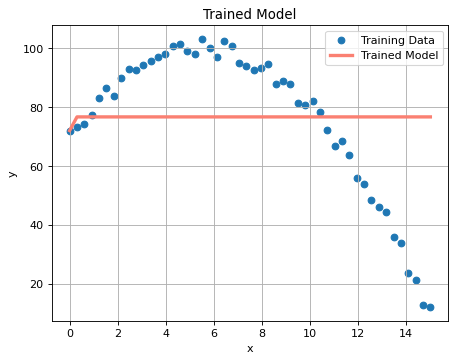

In [118]:
# Compute the corresponding output predictions
Y_predictions = model(X)

# Plot the training data points
plt.scatter(x_data, y_data, label="Training Data")

# Plot the trained model predictions
plt.plot(X, Y_predictions.detach().numpy(), label="Trained Model", color="salmon", linewidth = 3)

# Set the title, labels, legend, and display the plot
plt.title("Trained Model")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()

In such instances, when the loss fails to decrease with increasing training time, it is advisable to lower the learning rate. However, it's important to note that this adjustment requires extending the training duration, as a lower learning rate results in slower model learning.

Let's also simplify the number of nodes in the hidden layers.

#### **Training the Model (Take 2)**

In [125]:
model = Model(input_size = 1, hidden_size_1 = 6, hidden_size_2 = 6, output_size = 1);

# Define the Mean Squared Error (MSE) loss function
cost = nn.MSELoss()

# Define the stochastic gradient descent (SGD) optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001) # lowered the learning rate from 0.001 to 0.0001 (The model learns 10 times more slowly now)

# Define the number of epochs for training
epochs = 50000 # increased from 10,000 to 50,000

# Convert input and target data to PyTorch tensors
X = torch.tensor(x_data, dtype=torch.float32)
Y = torch.tensor(y_data, dtype=torch.float32)

# Loop through the specified number of epochs
for epoch in range(epochs):
    # Forward pass: compute predictions
    y_predictions = model(X)

    # Compute the loss between predictions and targets
    loss = cost(y_predictions, Y)

    # Print loss every 10,000 epochs
    if (epoch + 1) % 10000 == 0:
        print(f"Epoch [{epoch + 1:05}/{epochs}] - Loss: {loss.item():6.3f}")

    # Reset gradients to zero
    optimizer.zero_grad()

    # Backpropagation: compute gradients
    loss.backward()

    # Update model parameters using optimizer
    optimizer.step()

Epoch [10000/50000] - Loss: 44.401
Epoch [20000/50000] - Loss: 31.327
Epoch [30000/50000] - Loss: 16.013
Epoch [40000/50000] - Loss: 12.444
Epoch [50000/50000] - Loss:  5.164


Much better. Now, let's plot.

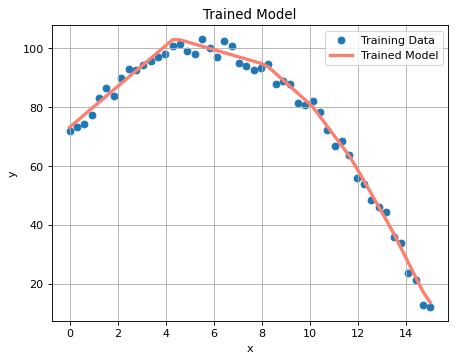

In [126]:
# Compute the corresponding output predictions
Y_predictions = model(X)

# Plot the training data points
plt.scatter(x_data, y_data, label="Training Data")

# Plot the trained model predictions
plt.plot(X, Y_predictions.detach().numpy(), label="Trained Model", color="salmon", linewidth = 3)

# Set the title, labels, legend, and display the plot
plt.title("Trained Model")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()

## **MNIST Classification using PyTorch**

The **MNIST** dataset is a large database of handwritten digits. The dataset contains 60,000 training images and 10,000 testing images, each of which is a grayscale image of size 28x28 pixels. Each image in the MNIST dataset is labeled with the corresponding digit it represents, ranging from 0 to 9

**Read in the Training and Testing Dataset**

The `torchvision.datasets` module provides access to several populat datasets for computer vision tasks, including the MNIST dataset.

In [127]:
from torchvision import datasets

# Define the directory where the data will be stored (default is the current directory, so this step is optional)
data_directory = './data'

# Import the training dataset
train_dataset = datasets.MNIST(
    root = data_directory,
    train = True,
    download = True,
);

# Import the testing dataset
test_dataset = datasets.MNIST(
    root = data_directory,
    train = False,
    download = True,
)

Here's what's going on:

1. We import the `datasets` module from `torchvision`.
2. We define a directory (`data_directory`) where the datasets will be stored. This directory will be created if it doesn't exist.
3. We import the training dataset by calling `datasets.MNIST()` with the following arguments:
   - `root`: The directory where the data will be stored. If not provided, it defaults to the current working directory.
   - `train=True`: Indicates that we want to import the training dataset.
   - `download=True`: Tells PyTorch to download the dataset if it's not already downloaded.
   - `transform=None`: By default, the transform is set to `None`, which means no transformations will be applied to the data. You can specify transformations here if needed (e.g., resizing, normalization).
4. We import the testing dataset in a similar way, but with `train=False` to indicate that we want to import the testing dataset.

After executing this code, `train_dataset` and `test_dataset` will contain the training and testing datasets, respectively, and you can use them to access the images and their corresponding labels for training and evaluation of machine learning models.

It's important to note that `train_dataset` and `test_dataset` are objects that contain images and their corresponding labels as properties. The images are encapsulated in the `data` property, whereas the labels are encapsulated in the `targets` property. Therefore:

In [129]:
# Assigning the data from the train_dataset to variable x
x = train_dataset.data # The 'data' attribute already stores the info as a Tensor so no conversion needed

# Assigning the targets from the train_dataset to variable y
y = train_dataset.targets # The 'targets' attribute already stores the info as a Tensor so no conversion needed

Before moving on, let's take a look at our data.

In [130]:
print(f"x = {x.shape}")
print(f"y = {y.shape}")

x = torch.Size([60000, 28, 28])
y = torch.Size([60000])


This is interpreted as follows: As for our input, we have 60000 samples, each of which is a 28x28 image. For the output, we have 60000 samples, each of which is a label for the corresponding image.

For example, let's try to plot one of the images and the corresponding label.

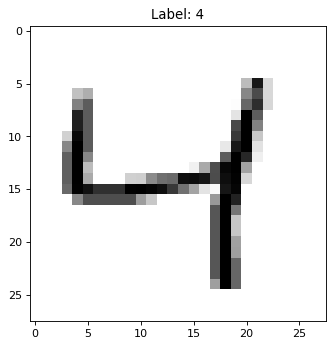

In [131]:
# Extracting the third image data from the dataset and converting it to a numpy array
image = x[2].numpy()

# Extracting the label corresponding to the third image
label = y[2]

# Displaying the image using matplotlib with grayscale reversed ('gray_r') colormap
plt.imshow(image, cmap='gray_r')

# Setting the title of the plot with the label information and adjusting font size
plt.title(f"Label: {label}")

# Displaying the plot
plt.show()

**The One Hot Encoder**

We'll now apply one-hot encoding to our labels. This ensures that each label is represented as a distinct vector, with a value of 1 in the index corresponding to the label and 0 elsewhere.

Let's demonstrate this concept using a test tensor. 

In [132]:
y_org = torch.tensor([2, 4, 3, 0, 1])
y_one_hot_encoded = F.one_hot(y_org)

In [133]:
print(f"Original Labels: \n{y_org}")
print(f"One Hot Encoded Labels: \n{y_one_hot_encoded}")

Original Labels: 
tensor([2, 4, 3, 0, 1])
One Hot Encoded Labels: 
tensor([[0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0]])


Note that for the label '2', the index at 2 is set to 1, and everything else is set to 0. Similarly, for the label '4', the index at 4 is set to 1, and everything else is set to 0. If we would like to go back the original representation, all we need to do is find the index of the maximum element. For example:

In [134]:
print(f"One Hot Encoded Labels: \n{y_one_hot_encoded[0]}")
print(f"Corresponds to label: \n{torch.argmax(y_one_hot_encoded[0])}")

One Hot Encoded Labels: 
tensor([0, 0, 1, 0, 0])
Corresponds to label: 
2


Let's apply this to our dataset. Recall, we have 10 distinct classes, so we'll need to represent each label using 10 bits.

In [135]:
y_one_hot_encoded = F.one_hot(y, num_classes = 10)
y_one_hot_encoded.shape

torch.Size([60000, 10])

We can interpret this as follows: `y_one_hot_encoded` contains 60,000 samples, each of which is a vector of size 10.

**The Issue with our Images**

Remember that we always want our input data to be in the form (rows, 1), meaning the data should be in a single column spanning across multiple rows. The issue with our images is that they are in a 28x28 shape.

This can be easily resolved by using the `view()` function in PyTorch, which is analogous to NumPy's `reshape` method.

In [136]:
x.shape

torch.Size([60000, 28, 28])

In [137]:
x_new = x.view(-1, 28**2)
x_new.shape

torch.Size([60000, 784])

The first argument `-1` instructs the `view()` method to keep the size of the first dimension (60000 in this case) unchanged. The second argument indicates that the view method should create a single vector of size $28 \times 28 = 784$. As a result, we now have 60000 samples, where each sample is a vector encapsulating the information of the image, with a size of 784.

**PyTorch Dataset Object**

The PyTorch Dataset object allows us to handle and manage data. It serves as an interface to provide access to our data, allowing us to easily load, preprocess, and iterate over our dataset during training or evaluation. The three main advantages, which we'll make use of are:

1. **Data Proprocessing**: We can implement custom data preprocessing within the Dataset object. This includes operations such as normalization, reisizing, and any other transformations required to prepare our data for training.
2. **Indexing**: The Dataset object allows us to efficiently index/access individual data samples or subsets of our data. 
3. **Integration with Dataloader**: The Dataset object integrates with PyTorch's DataLoader module, which is responsible for batching and shuffling. By passing a Dataset object to a DataLoader, we can efficiently iterate over batches of data during training or evaluation.

In [138]:
from torch.utils.data import Dataset

# Defining a custom dataset class
class CTDataset(Dataset):
    # Constructor method
    def __init__(self, x, y):
        # Initializing input data (x) and labels (y)
        self.x, self.y = x, y
        
        # Normalizing input data by scaling it between 0 and 1
        self.x = self.x / 255.
        
        # One-hot encoding labels and converting them to float
        self.y = F.one_hot(self.y, num_classes=10).float()
    
    # Method to get the length of the dataset
    def __len__(self):
        return self.x.shape[0]
    
    # Method to get a specific item from the dataset
    def __getitem__(self, index):
        # Returning input data and corresponding label at the given index
        return self.x[index], self.y[index]

In [139]:
# Creating training dataset using custom CTDataset class
train_ds = CTDataset(train_dataset.data, train_dataset.targets)

# Creating testing dataset using custom CTDataset class
test_ds = CTDataset(test_dataset.data, test_dataset.targets)

For example, it's much easier now to get a few sample images and the corresponding labels.

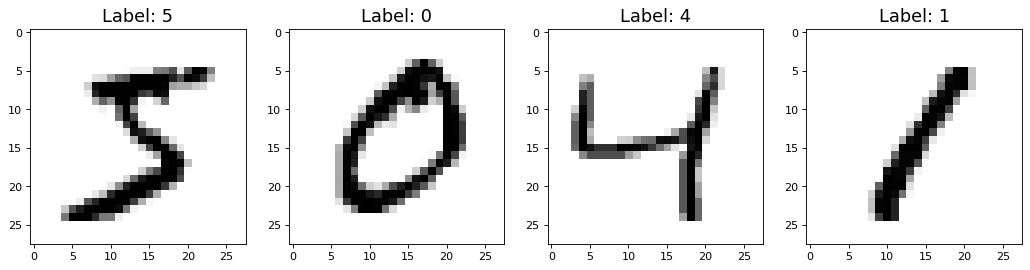

In [140]:
x_samples, y_samples = train_ds[0:4] # first 4 samples

fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (16, 6))

for i, (x, y) in enumerate(zip(x_samples, y_samples)):
    axes[i].imshow(x, cmap = 'gray_r');
    axes[i].set_title(f"Label: {torch.argmax(y)}", fontsize=16)

plt.show()

**PyTorch DataLoader Object**

The PyTorch `DataLoader` object is a utility that helps in iterating over a dataset during training or evaluation of a model. It provides features like:

1. **Batching**: It automatically generates batches of data, which is crucial for efficient training, especially when dealing with large datasets
2. **Shuffling**: It shuffles the data by default, which helps in preventing the model from learning the order of the data and potentially overfitting to that order. Shuffling is particularly important during training to ensure the model generalizes well to unseen data.

In [141]:
from torch.utils.data import DataLoader

# Creating a DataLoader object for training data
# train_ds is the training dataset created using CTDataset class
# batch_size is set to 5, meaning each batch will contain 5 samples
train_dl = DataLoader(train_ds, batch_size=5)

`train_dl` is actually an iterable. Each element is a batch that contains the images (stored as x) and their corresponding labels (stored as y). 

In [142]:
for x, y in train_dl:
    print(f"Images = {x.shape}")
    print(f"Labels: {y.shape}")
    break # Only print the first batch

Images = torch.Size([5, 28, 28])
Labels: torch.Size([5, 10])


This can be interpreted as: "The batch consists of 5 samples, each is an image of dimensions 28x28. The batch also holds the corresponding labels, each is a vector of size 10".

Now, since we have 60,000 samples and each batch contains 5 samples, we expect to have 12,000 batches, which is confirmed by the shape of length of `train_dl`.

In [143]:
len(train_dl)

12000

**Loss Function**

This time, we'll utilize another loss function: the cross-entropy loss.

In [144]:
L = nn.CrossEntropyLoss()

**Building the Neural Network**

For our network:

1. **Input Layer**: The input layer will consist of the same number of nodes as our input data. Remember that our input data will be reshaped to a tensor of size 28x28 using the `view(-1, 28**2)` method call. Therefore, our input layer has 784 nodes.
2. **Hidden Layers**
   1. **First Hidden Layer**: The first hidden layer will consist of 100 neurons.
   2. **Second Hidden Layer**: The second hidden layer will consist of 50 neurons.
3. **Output Layer**: The output layer will consist of 10 nodes, corresponding to the 10 possible classes.

In [145]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()  

        # Define layers
        self.input_layer = nn.Linear(28**2, 100)
        self.hidden_layer_1 = nn.Linear(100, 50)
        self.hidden_layer_2 = nn.Linear(50, 10)

    def forward(self, x):
        # Reshape input to a vector
        x = x.view(-1, 28**2)
        
        # Pass through the input layer and apply ReLU activation
        x = F.relu(self.input_layer(x))
        
        # Pass through the first hidden layer and apply ReLU activation
        x = F.relu(self.hidden_layer_1(x))
        
        # Pass through the second hidden layer
        x = self.hidden_layer_2(x)

        return x

In [146]:
model = Model()

Let's take a look at out untrained model's predictions

In [147]:
x_samples, y_samples = train_ds[0:4]

y_predictions = model(x_samples)

The network's predictions are:

In [148]:
y_predictions

tensor([[-0.0172,  0.1199, -0.0395, -0.0689, -0.0938,  0.0582, -0.1387, -0.0775,
          0.0114, -0.0410],
        [-0.0209,  0.1143, -0.0555, -0.0574, -0.0879,  0.0431, -0.1716, -0.0905,
         -0.0023, -0.0434],
        [-0.0488,  0.1369, -0.0641, -0.0749, -0.0750,  0.0847, -0.1020, -0.1222,
          0.0162, -0.0543],
        [-0.0376,  0.1232, -0.0461, -0.0936, -0.0897,  0.0751, -0.1492, -0.1185,
          0.0088, -0.0335]], grad_fn=<AddmmBackward0>)

Whereas, the actual labels are:

In [149]:
y_samples

tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

We can also compute the loss between our predictions and actual labels:

In [152]:
L(y_predictions, y_samples)

tensor(2.2511, grad_fn=<DivBackward1>)

Now, we'll move ahead to adjusting the weight and biases to minimize the loss function.

**Training the Model**

In [153]:
L = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [154]:
losses = []  # List to store losses
epochs = []  # List to store epochs

number_of_epochs = 20
number_of_batches = len(train_dl)

for epoch in range(number_of_epochs):
    print(f"Epoch [{epoch + 1:02}/{number_of_epochs}] Done")
    
    for i, (x, y) in enumerate(train_dl):
        # Forward pass
        y_predictions = model(x)
        
        # Compute loss
        loss = L(y_predictions, y)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Append epoch and loss to lists
        epochs.append(epoch + (i / number_of_batches))  # Corrected the variable name
        losses.append(loss.item())

# Convert lists to numpy arrays and return
epochs = np.array(epochs)
losses = np.array(losses)

Epoch [01/20] Done
Epoch [02/20] Done
Epoch [03/20] Done
Epoch [04/20] Done
Epoch [05/20] Done
Epoch [06/20] Done
Epoch [07/20] Done
Epoch [08/20] Done
Epoch [09/20] Done
Epoch [10/20] Done
Epoch [11/20] Done
Epoch [12/20] Done
Epoch [13/20] Done
Epoch [14/20] Done
Epoch [15/20] Done
Epoch [16/20] Done
Epoch [17/20] Done
Epoch [18/20] Done
Epoch [19/20] Done
Epoch [20/20] Done


We can now plot the loss function for each batch.

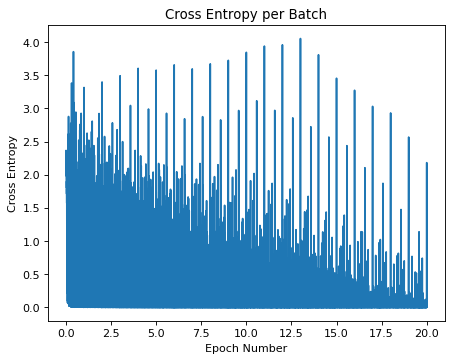

In [155]:
# Plotting the epochs against the loss
plt.plot(epochs, losses)

# Adding labels to the x and y axes
plt.xlabel("Epoch Number")
plt.ylabel("Cross Entropy") 

# Adding a title to the plot
plt.title("Cross Entropy per Batch")  

# Displaying the plot
plt.show()

Each of these data points corresponds to the loss evaluated on a batch of 5 images. However, an entire epoch consists of 60,000 images. We can average the loss across all the data per epoch to obtain the loss for all 60,000 images.

In [156]:
# Reshape the 'epochs' array into a 2D array with 20 rows (Each row represents a single epoch)
# Calculate the mean of each row along axis 1 to get the average epoch number for each batch
epochs_avg = epochs.reshape(20, -1).mean(axis=1)

# Reshape the 'losses' array into a 2D array with 20 rows (Each row corresponds to the losses of a single epoch)
# Calculate the mean of each row along axis 1 to get the average loss for each batch
losses_avg = losses.reshape(20, -1).mean(axis=1)

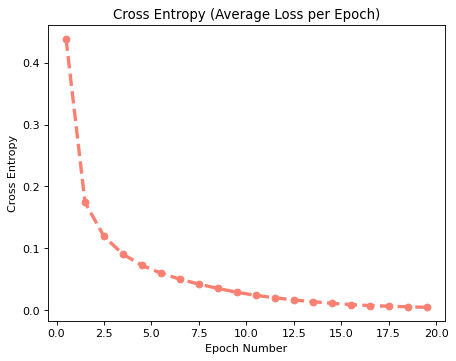

In [157]:
# Plotting the average loss against the average epoch number
plt.plot(epochs_avg, losses_avg, color = 'salmon', linewidth = 3, marker = 'o', linestyle = '--')

# Adding labels to the x and y axes
plt.xlabel('Epoch Number') 
plt.ylabel('Cross Entropy') 

# Adding a title to the plot
plt.title('Cross Entropy (Average Loss per Epoch)')

# Displaying the plot
plt.show()

**Evaluating our Model**

Let's look at a sample training image and the corresponding label.

In [158]:
x_sample, y_sample = train_ds[0]

y_predicted = model(x_sample)

print(f"Actual lable:\n {y_sample}")
print(f"Predicted lable:\n {y_predicted}")

Actual lable:
 tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])
Predicted lable:
 tensor([[ -7.2287,  -0.0419,   0.0464,  23.1156, -25.2088,  27.5959, -12.6505,
           2.8456,  -7.1129,  -3.0682]], grad_fn=<AddmmBackward0>)


What we get is the probability of the image belonging to each of the 10 classes. To find the actual label, all we need to do is take the index of the maximum value.

In [159]:
label = torch.argmax(y_predicted)
print(f"Predicted Label: {label}")

Predicted Label: 5


which is exactly what the sample image is.

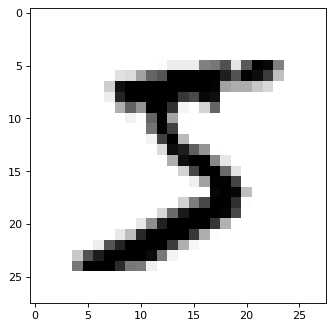

In [160]:
plt.imshow(x_sample, cmap = 'gray_r');

**Testing on the Training Dataset**

In [161]:
x_samples, y_samples = train_ds[:40]
y_predictions = model(x_samples)
y_predicted_labels = y_predictions.argmax(axis = 1)

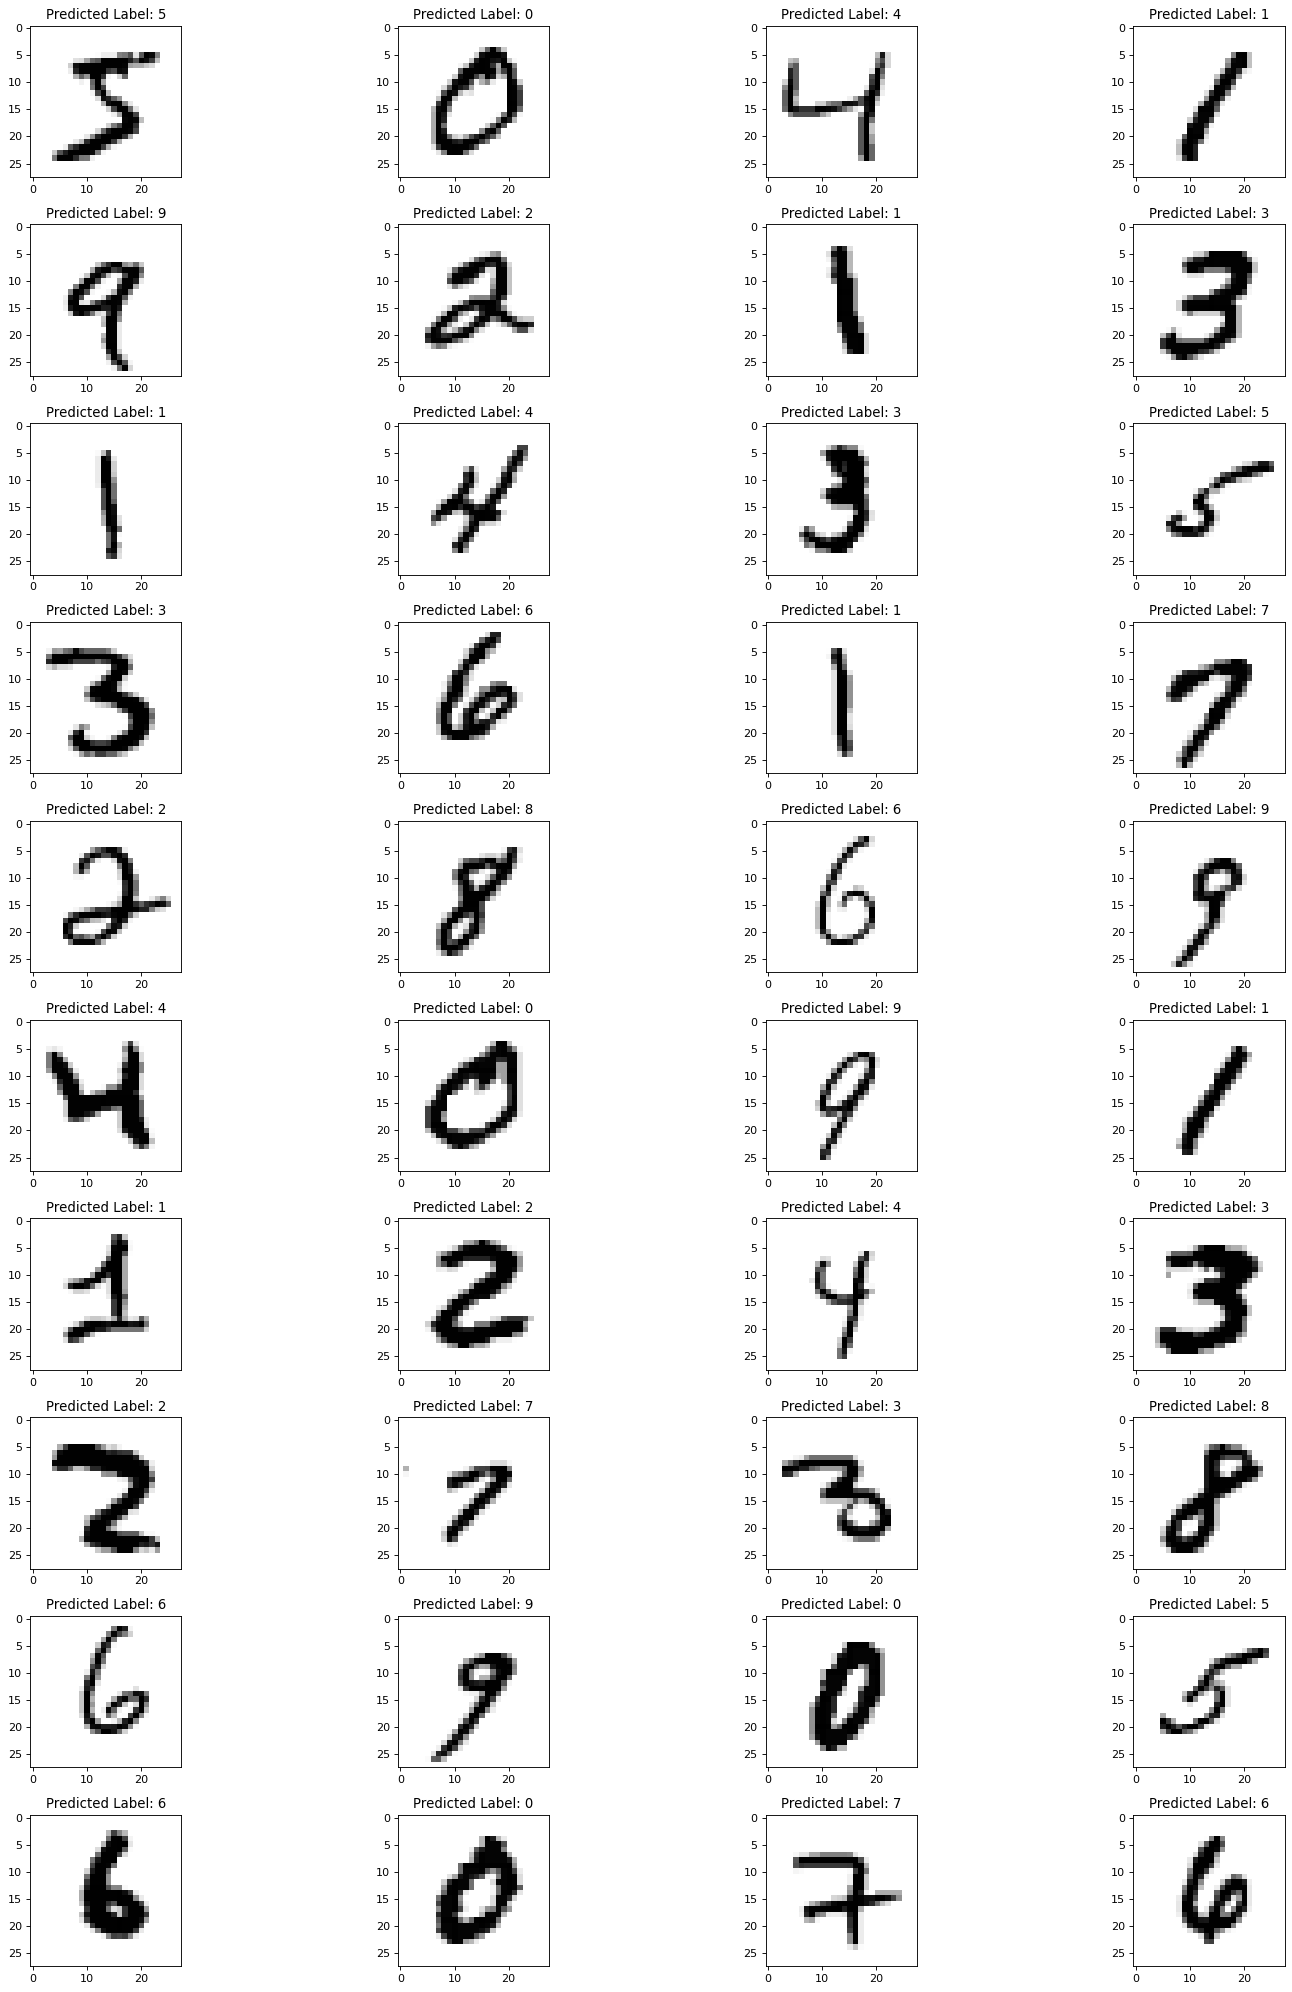

In [162]:
# Create a figure and an array of subplots with 10 rows and 4 columns
# figsize sets the size of the entire figure
fig, axes = plt.subplots(10, 4, figsize=(20, 25))

# Iterate through each subplot
for i in range(40):
    # Select the subplot at position i
    plt.subplot(10, 4, i + 1)
    
    # Display an image in grayscale with the specified colormap
    plt.imshow(x_samples[i], cmap='gray_r')
    
    # Set the title for the current subplot, including the predicted label
    plt.title(f"Predicted Label: {y_predicted_labels[i]}")

# Ensure that plots are properly spaced within the figure
fig.tight_layout()

# Display the entire figure with all subplots
plt.show()

**Testing on the Testing Dataset**

These evaluations are conducted on the training dataset. However, to assess the model's generalizability, we need to evaluate it on the test dataset, which comprises images the model did not encounter during training.

In [163]:
x_samples, y_samples = test_ds[:40]
y_predictions = model(x_samples)
y_predicted_labels = y_predictions.argmax(axis = 1)

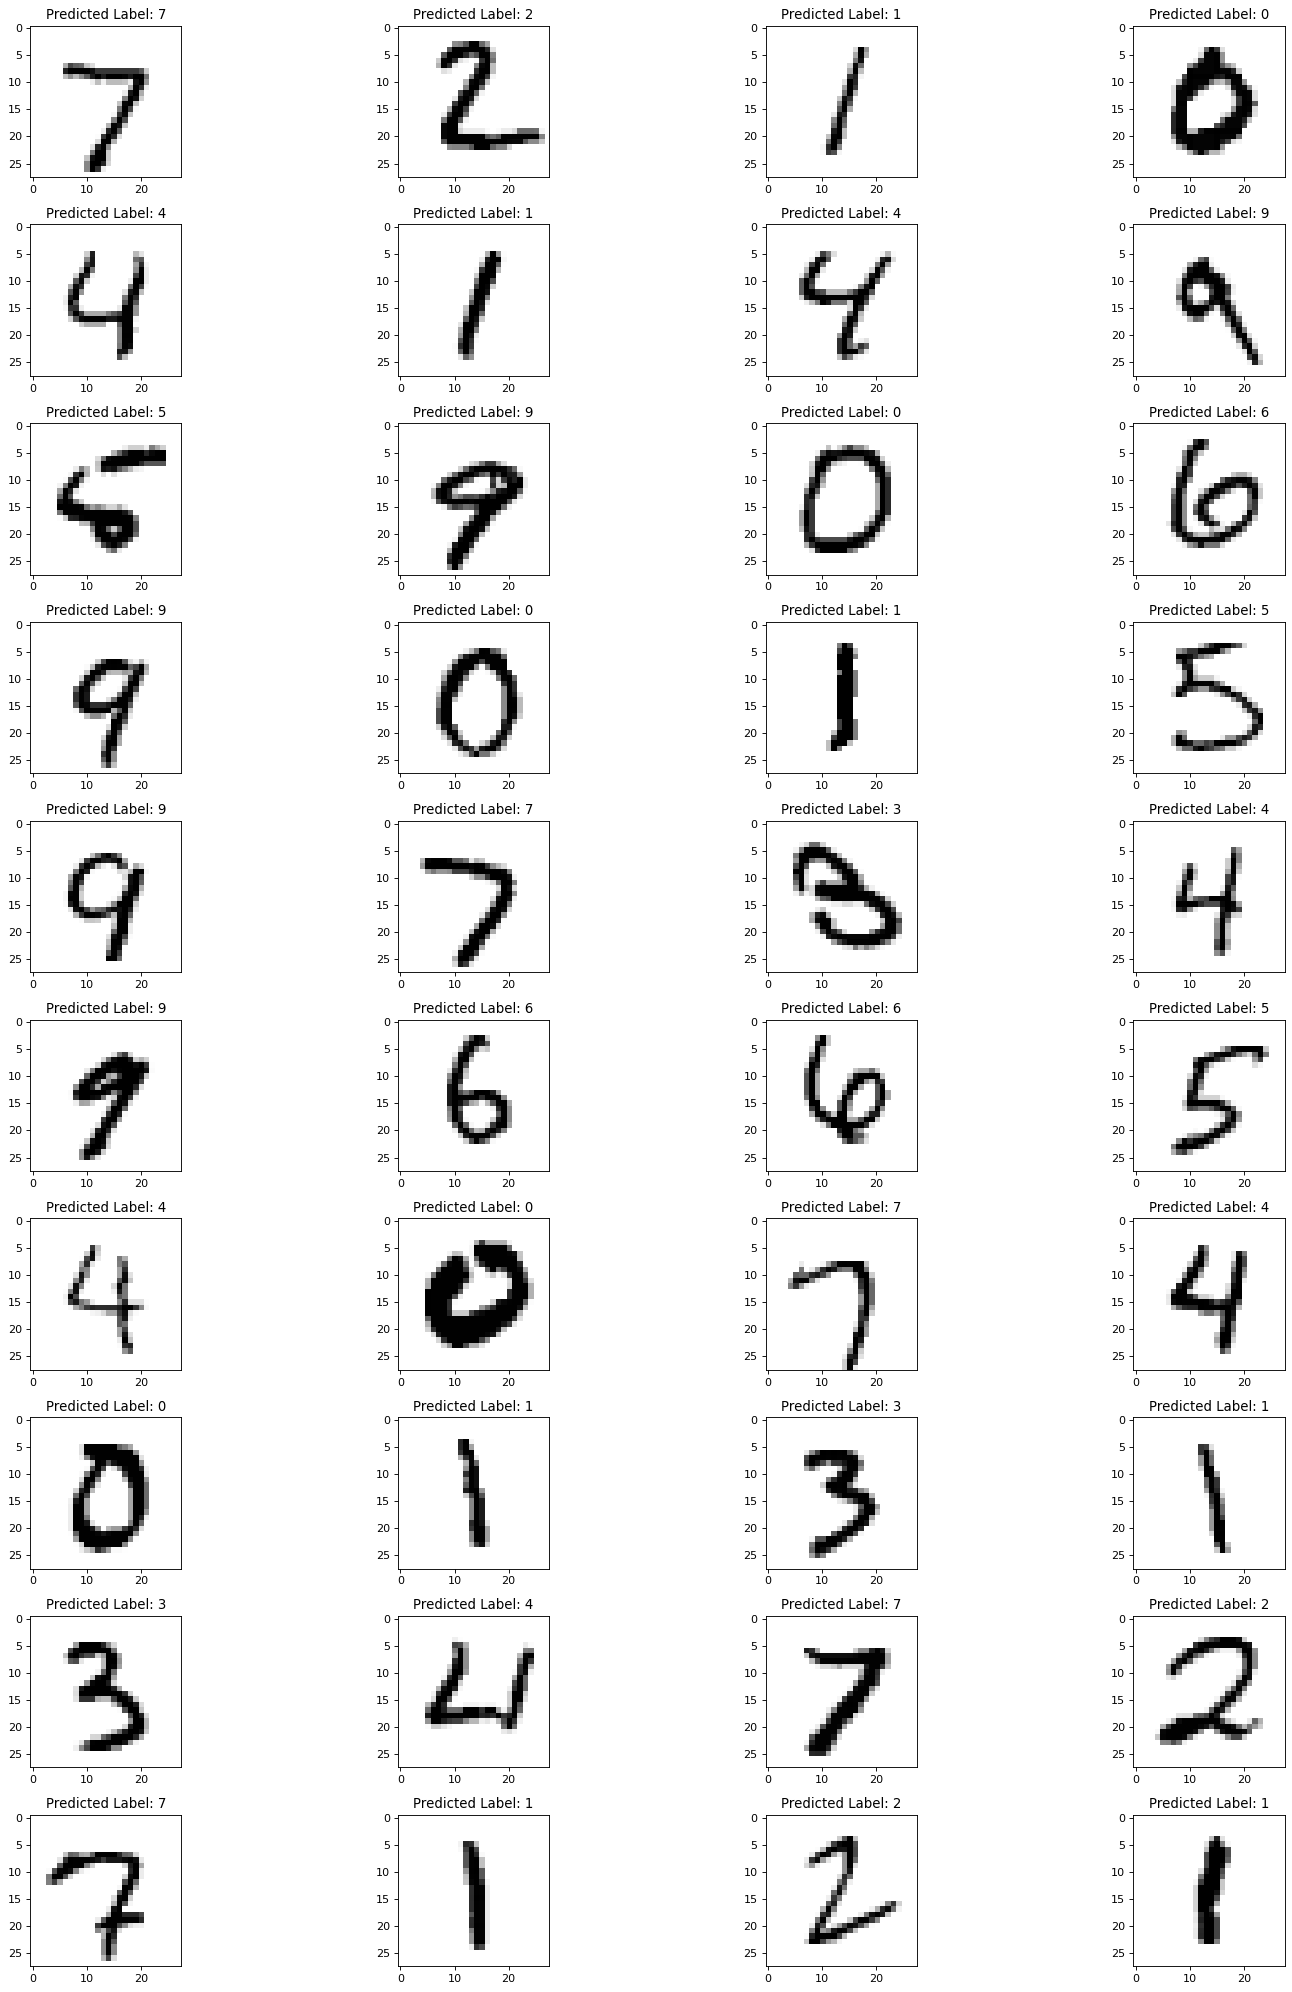

In [164]:
# Create a figure and an array of subplots with 10 rows and 4 columns
# figsize sets the size of the entire figure
fig, axes = plt.subplots(10, 4, figsize=(20, 25))

# Iterate through each subplot
for i in range(40):
    # Select the subplot at position i
    plt.subplot(10, 4, i + 1)
    
    # Display an image in grayscale with the specified colormap
    plt.imshow(x_samples[i], cmap='gray_r')
    
    # Set the title for the current subplot, including the predicted label
    plt.title(f"Predicted Label: {y_predicted_labels[i]}")

# Ensure that plots are properly spaced within the figure
fig.tight_layout()

# Display the entire figure with all subplots
plt.show()

**Peformance Metrics**

In [165]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

x_samples, y_samples = test_ds[:]
y_real_labels = y_samples.argmax(axis = 1)

y_predictions = model(x_samples)
y_predicted_labels = y_predictions.argmax(axis = 1) 

# Compute accuracy
accuracy = accuracy_score(y_real_labels, y_predicted_labels)

# Compute precision
precision = precision_score(y_real_labels, y_predicted_labels, average='macro')

# Compute recall
recall = recall_score(y_real_labels, y_predicted_labels, average='macro')

# Compute F1-score
f1 = f1_score(y_real_labels, y_predicted_labels, average='macro')

print(f"Accuracy: {accuracy * 100:8.2f}%")
print(f"Precision: {precision * 100:7.2f}%")
print(f"Recall: {recall * 100:10.2f}%")
print(f"F1-score: {f1 * 100:8.2f}%")

Accuracy:    97.45%
Precision:   97.43%
Recall:      97.43%
F1-score:    97.42%
